# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [41]:
import math
import scipy as sp
from scipy import stats
from scipy.stats import norm

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [7]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


mean: 98.24923076923078
SD: 0.7331831580389454


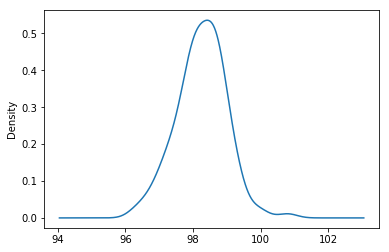

In [60]:
#1
import matplotlib.pyplot as plt
%matplotlib inline

print('mean: ' + str(df.temperature.mean()))
print('SD: ' + str(df.temperature.std()))
df['temperature'].plot(kind='kde')

#the temperature plot looks approximately normal: ~N(98.25,0.73)

In [24]:
#2

len(df)

#the dataset has no documentation, but it is reasonable to assume that the entries are independent observations
#the results of the CLT are reasonable for sample sizes greater than 30; 130 is sufficiently large
#this dataset is a single sample of size 130; a statistic computed using this sample can be reasonably
#assumed to be normally distributed according to the CLT

130

In [31]:
#3 

#the "true population mean" is not something that can be measured, it is estimated/tested using samples
#using the sample mean as the sample statistic, we can conduct a one-sample hypothesis test 
#we are not comparing means, so we do not use a two-sample test
#since we do not know the population SD, it is more appropriate to use a t-test


In [34]:
sp.stats.ttest_1samp(df.temperature, popmean=98.6)

#pvalue of 2.4 * 10^-7 suggests the true population mean is not 98.6

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [47]:
#use the sample standard deviation as an estimate for the population standard deviation
#the two-tailed pvalue still suggests that we reject the null--the true population mean is not 98.6
#the result of the test is so extreme that the error introduced from using a z-test instead of a t-test
#does not affect the result of the test

standardized_sample_stat = (df.temperature.mean() - 98.6)/(df.temperature.std()/math.sqrt(len(df)))
norm.cdf(standardized_sample_stat)*2

4.9021570141133797e-08

In [64]:
#4 
#we are considering individuals here so there is no statistic to calculate; we can only define abnormality
#as an observation falling in an arbitrarily defined region of the PDF--which is estimated using our sample
#if an observation falls outside of two standard deviations from the mean, it outside of the ~95% probability region
#and can be defined as "abnormal" 
norm_range = [0,0]
norm_range[0] = df.temperature.mean() - 2*df.temperature.std()
norm_range[1] = df.temperature.mean() + 2*df.temperature.std()
print('margin of error: ' + str(2*df.temperature.std()))
print('95% C.I.: ' + str(norm_range))

margin of error: 1.4663663160778908
95% C.I.: [96.78286445315288, 99.71559708530867]


In [76]:
#5
#use a two sample t-test to test for difference in means. again, we do not know the population SD so we must use
#a t-test. clearly, we need a two-sample test to test the male sample against the female sample
df.groupby(['gender']).mean()

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


In [79]:
sp.stats.ttest_ind(df[df.gender == 'F'].temperature,df[df.gender == 'M'].temperature)
#the pvalue of 0.023 suggests that there is a difference in the average temperature between males and females
#despite the seemingly close average body temperatures, our samples sizes of 65 for each group would lead us to
#expect the two means to be closer. the fact that they are not, suggests that there is sufficient evidence to
#suggest that the "true population means" actually differ between the two groups.

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)